
Index No: 249321V 

Name: HDPR PERERA

In [3]:
# !pip install opencv-python
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure

import warnings
warnings.filterwarnings('ignore')

#### Question 01

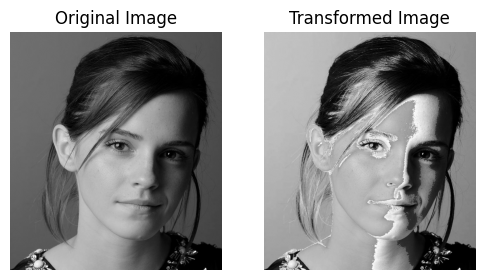

In [22]:
img_orig = cv.imread('images/emma.jpg', cv.IMREAD_GRAYSCALE)

t1 = np.linspace(0, 49, 50).astype('uint8')
t2 = np.linspace(100, 254, 100).astype('uint8')
t3 = np.linspace(150, 255, 106).astype('uint8')

transform = np.concatenate((t1, t2, t3), axis=0).astype('uint8')
image_transformed = cv.LUT(img_orig, transform)

plt.figure(figsize=(6,4))

plt.subplot(1, 2, 1)
plt.imshow(img_orig, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image_transformed, cmap='gray')
plt.title("Transformed Image")
plt.axis('off')

plt.show()

#### Question 02

(a) Enhance White Matter

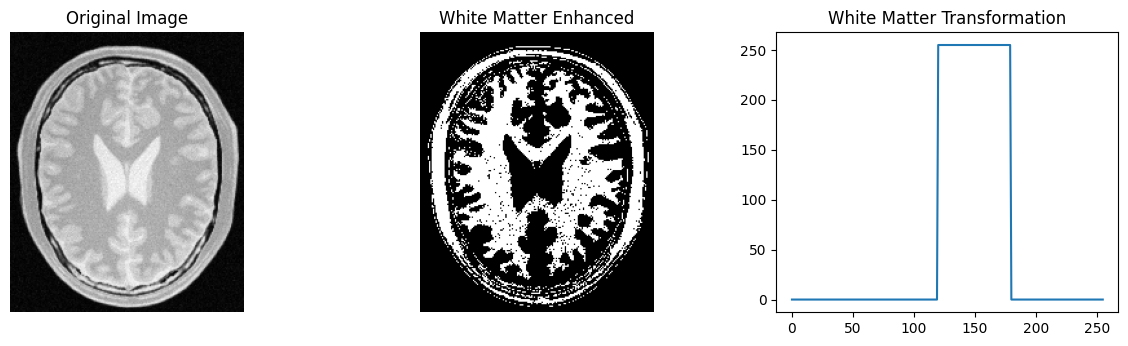

In [31]:
img = cv.imread('images/brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)

w1 = np.linspace(0, 0, 120).astype('uint8')
w2 = np.linspace(255, 255, 60).astype('uint8')
w3 = np.linspace(0, 0, 76).astype('uint8')
transform_white = np.concatenate((w1, w2, w3), axis=0).astype('uint8')
img_white = cv.LUT(img, transform_white)

plt.figure(figsize=(15,8))

plt.subplot(2, 3, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(img_white, cmap='gray')
plt.title("White Matter Enhanced")
plt.axis('off')

plt.subplot(2, 3, 3)
plt.plot(transform_white)
plt.title("White Matter Transformation")

plt.show()

(b) Enhance Gray Matter

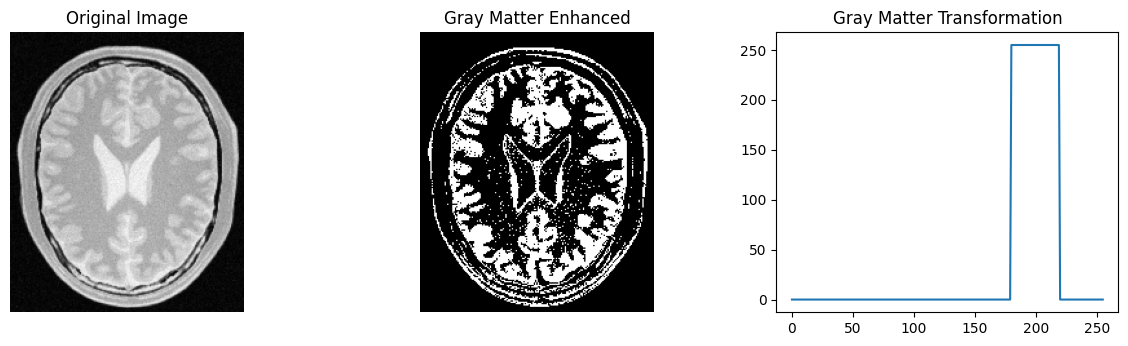

In [33]:
g1 = np.linspace(0, 0, 180).astype('uint8')
g2 = np.linspace(255, 255, 40).astype('uint8')
g3 = np.linspace(0, 0, 36).astype('uint8')
transform_gray = np.concatenate((g1, g2, g3), axis=0).astype('uint8')
img_gray = cv.LUT(img, transform_gray)

plt.figure(figsize=(15,8))

plt.subplot(2, 3, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(img_gray, cmap='gray')
plt.title("Gray Matter Enhanced")
plt.axis('off')

plt.subplot(2, 3, 3)
plt.plot(transform_gray)
plt.title("Gray Matter Transformation")

plt.show()

#### Question 3

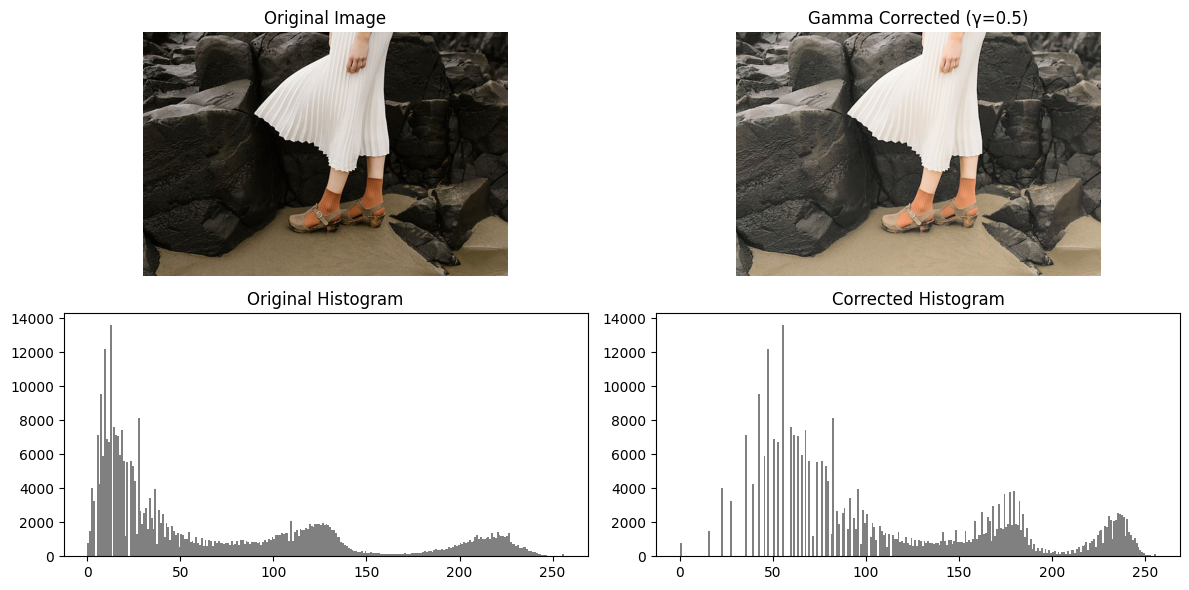

In [35]:
img_org = cv.imread("images/highlights_and_shadows.jpg")
img = cv.cvtColor(img_org, cv.COLOR_BGR2LAB)
gamma = 0.5 

L, a, b = cv.split(img) # split into L, a, b

# apply gamma correction
L_normalized = L / 255.0
L_gamma = np.power(L_normalized, gamma)
L_corrected = np.uint8(L_gamma * 255)

corrected_img = cv.merge([L_corrected, a, b])
corrected_img_bgr = cv.cvtColor(corrected_img, cv.COLOR_LAB2BGR)

plt.figure(figsize=(12,6))

plt.subplot(2,2,1)
plt.imshow(cv.cvtColor(img_org, cv.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

plt.subplot(2,2,2)
plt.imshow(cv.cvtColor(corrected_img_bgr, cv.COLOR_BGR2RGB))
plt.title(f"Gamma Corrected (γ={gamma})")
plt.axis("off")

plt.subplot(2,2,3)
plt.hist(L.ravel(), 256, [0,256], color='gray')
plt.title("Original Histogram")

plt.subplot(2,2,4)
plt.hist(L_corrected.ravel(), 256, [0,256], color='gray')
plt.title("Corrected Histogram")

plt.tight_layout()
plt.show()

#### Question 4

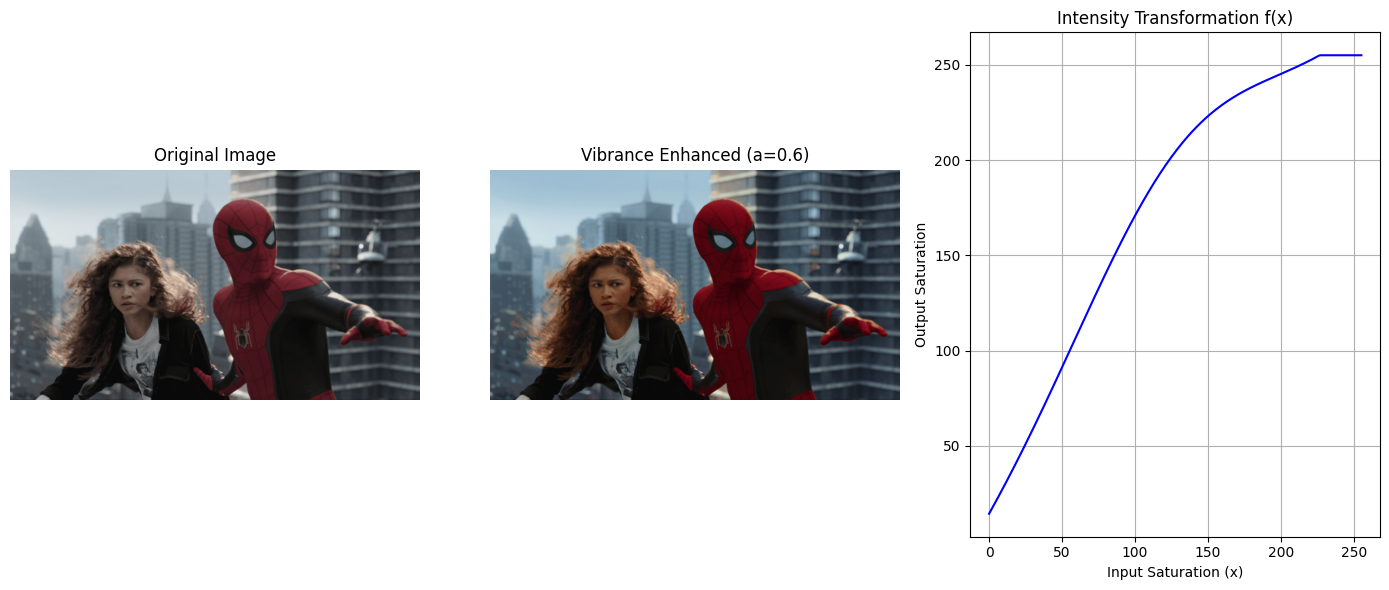

In [ ]:
img = cv.imread("images/spider.png")
sigma = 70
a = 0.6  

# split the image to H,S, V planes
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
h, s, v = cv.split(hsv)

# apply transformation to saturation plane
x = np.arange(256)
f_x = np.minimum(x + a * 128 * np.exp(-((x-128)**2) / (2*sigma**2)), 255)
s_transformed = f_x[s]

# recombine three planes
hsv_enhanced = cv.merge([h, s_transformed.astype(np.uint8), v])
img_enhanced = cv.cvtColor(hsv_enhanced, cv.COLOR_HSV2BGR)

plt.figure(figsize=(14,6))

plt.subplot(1,3,1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(cv.cvtColor(img_enhanced, cv.COLOR_BGR2RGB))
plt.title(f"Vibrance Enhanced (a={a})")
plt.axis("off")

plt.subplot(1,3,3)
plt.plot(x, f_x, color='blue')
plt.title("Intensity Transformation f(x)")
plt.xlabel("Input Saturation (x)")
plt.ylabel("Output Saturation")
plt.grid(True)

plt.tight_layout()
plt.show()

#### Question 5

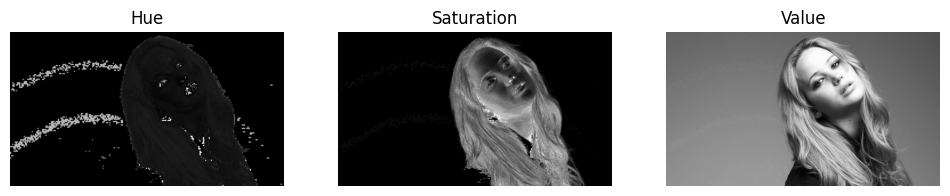

In [ ]:
img = cv.imread('images/jeniffer.jpg')

# (a) split image into h, S, V
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
h, s, v = cv.split(hsv)

plt.figure(figsize=(12,4))
plt.subplot(1,3,1); plt.imshow(h, cmap='gray'); plt.title('Hue') ;plt.axis("off")
plt.subplot(1,3,2); plt.imshow(s, cmap='gray'); plt.title('Saturation') ;plt.axis("off")
plt.subplot(1,3,3); plt.imshow(v, cmap='gray'); plt.title('Value') ;plt.axis("off")
plt.show()

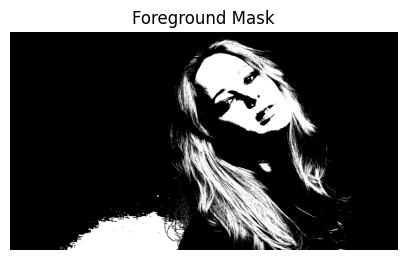

In [25]:
# (b) Threshold to extract foreground (example: using value plane)
_, mask = cv.threshold(v, 150, 255, cv.THRESH_BINARY)  # adjust 128 if needed

plt.figure(figsize=(5,3))
plt.imshow(mask, cmap='gray'); plt.title('Foreground Mask'); plt.axis("off")
plt.show()

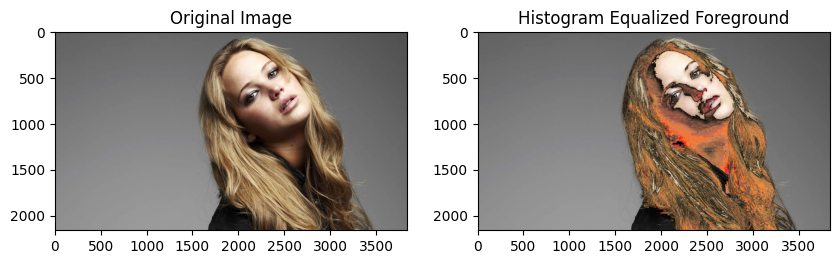

In [ ]:
# (c) Extract foreground using mask
foreground = cv.bitwise_and(v, v, mask=mask)

# Compute histogram of foreground
hist = cv.calcHist([foreground], [0], mask, [256], [0,256])

# (d) Cumulative sum
cdf = hist.cumsum()
cdf_normalized = cdf * 255 / cdf[-1]  # normalize to 0-255

# (e) Histogram equalization on foreground
foreground_eq = cv.LUT(foreground, cdf_normalized.astype('uint8'))

# (f) Combine with background
background = cv.bitwise_and(v, v, mask=cv.bitwise_not(mask))
result_v = cv.add(background, foreground_eq)

# Merge back HSV
result_hsv = cv.merge([h, s, result_v])
result_img = cv.cvtColor(result_hsv, cv.COLOR_HSV2BGR)

# Show original and result
plt.figure(figsize=(10,5))
plt.subplot(1,2,1); plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)); plt.title('Original Image')
plt.subplot(1,2,2); plt.imshow(cv.cvtColor(result_img, cv.COLOR_BGR2RGB)); plt.title('Histogram Equalized Foreground')
plt.show()

#### Question 6

(a) Using filter2D

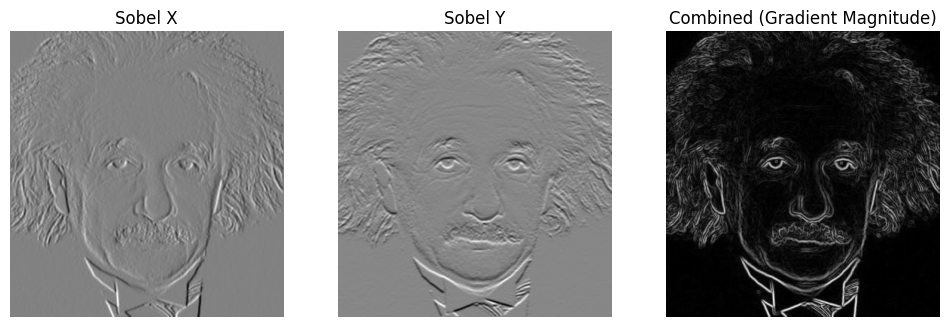

In [ ]:
img = cv.imread('images/einstein.png', cv.IMREAD_GRAYSCALE)

sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=np.float32)
sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], dtype=np.float32)

grad_x = cv.filter2D(img, cv.CV_64F, sobel_x)
grad_y = cv.filter2D(img, cv.CV_64F, sobel_y)

# get combnation of x, y
grad_mag = cv.magnitude(grad_x, grad_y)

plt.figure(figsize=(12,6))

plt.subplot(1,3,1)
plt.imshow(grad_x, cmap='gray')
plt.title("Sobel X")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(grad_y, cmap='gray')
plt.title("Sobel Y")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(grad_mag, cmap='gray')
plt.title("Combined (Gradient Magnitude)")
plt.axis("off")

plt.show()

(b) Manual convolution (own code)

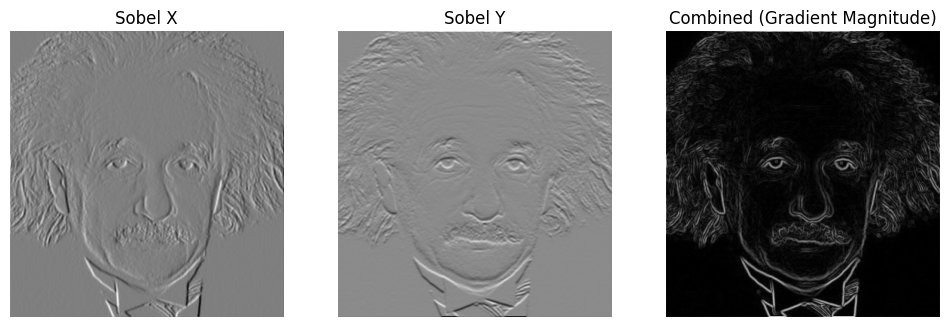

In [7]:
def convolution(image, kernel):
    h, w = image.shape
    kh, kw = kernel.shape
    pad_h, pad_w = kh//2, kw//2
    padded = np.pad(image, ((pad_h,pad_h),(pad_w,pad_w)), mode='constant')
    output = np.zeros_like(image, dtype=np.float32)
    for i in range(h):
        for j in range(w):
            region = padded[i:i+kh, j:j+kw]
            output[i,j] = np.sum(region * kernel)
    return output

grad_x_b = convolution(img, sobel_x)
grad_y_b = convolution(img, sobel_y)

# get combnation of x, y
grad_mag_b = np.sqrt(grad_x_b**2 + grad_y_b**2)

plt.figure(figsize=(12,6))

plt.subplot(1,3,1)
plt.imshow(grad_x_b, cmap='gray')
plt.title("Sobel X")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(grad_y_b, cmap='gray')
plt.title("Sobel Y")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(grad_mag_b, cmap='gray')
plt.title("Combined (Gradient Magnitude)")
plt.axis("off")
plt.show()

(c) Using separability

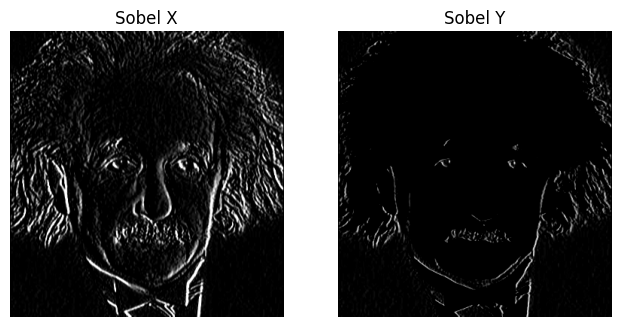

In [16]:
# Separable filters
v = np.array([[1], [2], [1]], dtype=np.float32)   # vertical smoothing
h = np.array([[1, 0, -1]], dtype=np.float32)     # horizontal differences

# --- Sobel X ---
temp_x = cv.filter2D(img, -1, h)    
sobel_x = cv.filter2D(temp_x, -1, v)  

# --- Sobel Y ---
temp_y = cv.filter2D(img, -1, v)    
sobel_y = cv.filter2D(temp_y, -1, h)  

plt.figure(figsize=(12,6))
plt.subplot(1,3,1); plt.imshow(sobel_x, cmap='gray'); plt.title("Sobel X"); plt.axis("off")
plt.subplot(1,3,2); plt.imshow(sobel_y, cmap='gray'); plt.title("Sobel Y"); plt.axis("off")
plt.show()

#### Question 7

In [14]:
# Nearest Neighbor Interpolation
def zoom_nearest(img, s):
    h, w = img.shape[:2]
    new_h, new_w = int(h * s), int(w * s)
    output = np.zeros((new_h, new_w, img.shape[2]), dtype=img.dtype)
    
    for i in range(new_h):
        for j in range(new_w):
            # Map back to nearest neighbor
            x = int(i / s)
            y = int(j / s)
            output[i, j] = img[x, y]
    return output

# Bilinear Interpolation
def zoom_bilinear(img, s):
    h, w = img.shape[:2]
    new_h, new_w = int(h * s), int(w * s)
    output = np.zeros((new_h, new_w, img.shape[2]), dtype=np.float32)

    for i in range(new_h):
        for j in range(new_w):
            # Map back
            x = i / s
            y = j / s

            x0, y0 = int(np.floor(x)), int(np.floor(y))
            x1, y1 = min(x0+1, h-1), min(y0+1, w-1)

            dx, dy = x - x0, y - y0
            top = (1-dy)*img[x0,y0] + dy*img[x0,y1]
            bottom = (1-dy)*img[x1,y0] + dy*img[x1,y1]
            output[i,j] = (1-dx)*top + dx*bottom
    
    return np.clip(output,0,255).astype(np.uint8)

# Normalized SSD
def normalized_ssd(img1, img2):
    img1 = img1.astype(np.float32)
    img2 = img2.astype(np.float32)
    ssd = np.sum((img1 - img2) ** 2)
    norm_ssd = ssd / np.sum(img1 ** 2)
    return norm_ssd

SSD (Nearest Neighbor): 0.0041900394
SSD (Bilinear): 0.00775718


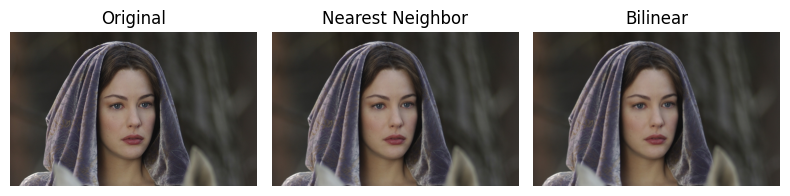

In [15]:
# Testing images
orig = cv.imread("images/a1q8images/im02.png")   # Original large image
small = cv.imread("images/a1q8images/im02small.png")    # Zoomed-out version

# Scale-up the small image by factor of 4
s = 4
scaled_nn = zoom_nearest(small, s)
scaled_bi = zoom_bilinear(small, s)

# Compute SSD
ssd_nn = normalized_ssd(orig, scaled_nn)
ssd_bi = normalized_ssd(orig, scaled_bi)

print("SSD (Nearest Neighbor):", ssd_nn)
print("SSD (Bilinear):", ssd_bi)

plt.figure(figsize=(8,12))
plt.subplot(1,3,1)
plt.imshow(cv.cvtColor(orig, cv.COLOR_BGR2RGB))
plt.title("Original")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(cv.cvtColor(scaled_nn, cv.COLOR_BGR2RGB))
plt.title("Nearest Neighbor")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(cv.cvtColor(scaled_bi, cv.COLOR_BGR2RGB))
plt.title("Bilinear")
plt.axis("off")

plt.tight_layout()
plt.show()

#### Question 8

(a) Segment the image

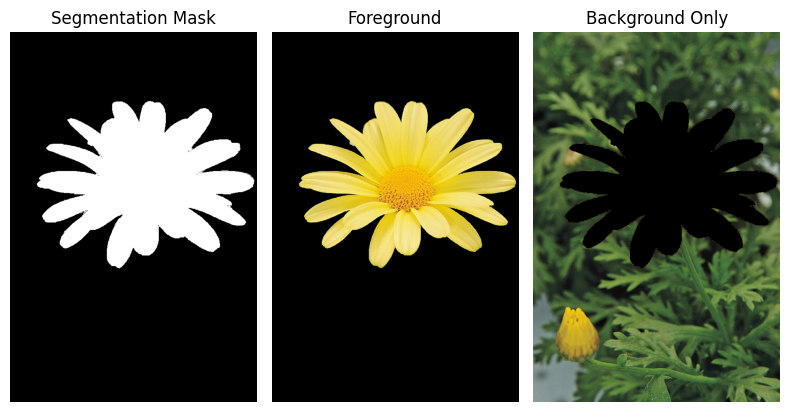

In [3]:
img = cv.imread("images/daisy.jpg")   
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

mask = np.zeros(img.shape[:2], np.uint8)

bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

# define a rectangle around the flower
x1 = 50
y1 = 136
y2 = 557
rect = (x1, 136, img.shape[1]-x1, y2-y1)  #(x,y,w,h)

cv.grabCut(img_rgb, mask, rect, bgdModel, fgdModel, 5, cv.GC_INIT_WITH_RECT)

# Create final mask: 1 (foreground), 0 (background)
mask2 = np.where((mask==2)|(mask==0), 0, 1).astype('uint8')

# Extract foreground and background
foreground = img_rgb * mask2[:, :, np.newaxis]
background = img_rgb * (1 - mask2[:, :, np.newaxis])

plt.figure(figsize=(8, 5))

plt.subplot(1, 3, 1)
plt.imshow(mask2, cmap='gray')
plt.title("Segmentation Mask")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(foreground)
plt.title("Foreground")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(background)
plt.title("Background Only")
plt.axis("off")

plt.tight_layout()
plt.show()

(b) Enhanced image with a blurred background

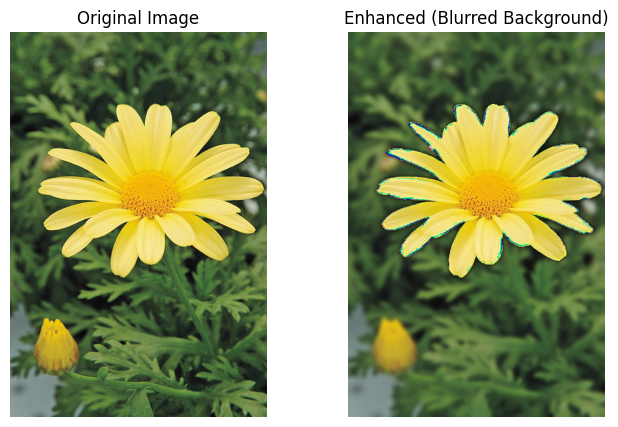

In [10]:
# Create blurred background only
background_only = img_rgb * (1 - mask2[:, :, np.newaxis])   # original background
blurred_bg_only = cv.GaussianBlur(background_only, (25, 25), 0)

# Combine blurred background with sharp foreground
blurred_combined = blurred_bg_only + foreground

plt.figure(figsize=(8, 5))

plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(blurred_combined.astype(np.uint8))
plt.title("Enhanced (Blurred Background)")
plt.axis("off")

plt.show()

#### Question 9

Number of rice grains (Gaussian image): 66
Number of rice grains (Salt-and-Pepper image): 79


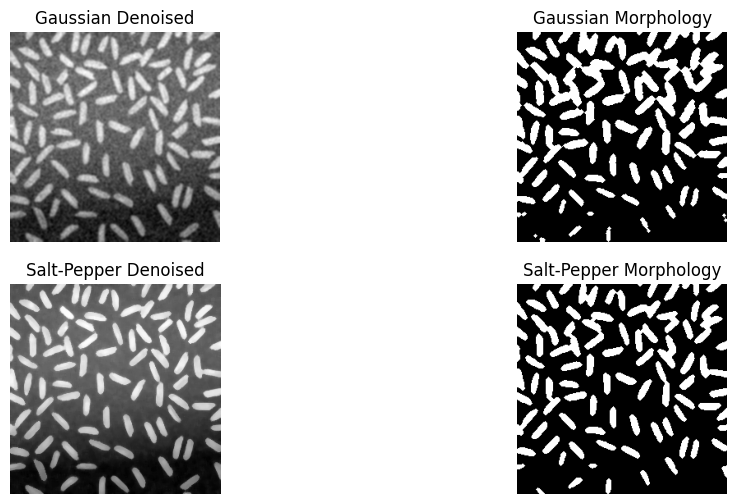

In [12]:
img_gaussian = cv.imread('images/rice_gaussian_noise.png', cv.IMREAD_GRAYSCALE)
img_saltpepper = cv.imread('images/rice_salt_pepper_noise.png', cv.IMREAD_GRAYSCALE)

# --- (a) Gaussian noise removal ---
img_gaussian_denoised = cv.GaussianBlur(img_gaussian, (5,5), 0)

# --- (b) Salt-and-pepper noise removal ---
img_saltpepper_denoised = cv.medianBlur(img_saltpepper, 5)

# --- (c) Otsu's thresholding ---
_, thresh_gaussian = cv.threshold(img_gaussian_denoised, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
_, thresh_saltpepper = cv.threshold(img_saltpepper_denoised, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# --- (d) Morphological operations ---
# Remove small objects and fill holes
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (3,3))

# For Gaussian image
morph_gaussian = cv.morphologyEx(thresh_gaussian, cv.MORPH_OPEN, kernel, iterations=2)
morph_gaussian = cv.morphologyEx(morph_gaussian, cv.MORPH_CLOSE, kernel, iterations=2)

# For Salt-and-Pepper image
morph_saltpepper = cv.morphologyEx(thresh_saltpepper, cv.MORPH_OPEN, kernel, iterations=2)
morph_saltpepper = cv.morphologyEx(morph_saltpepper, cv.MORPH_CLOSE, kernel, iterations=2)

# --- (e) Connected components for counting ---
num_labels_gaussian, labels_im_gaussian = cv.connectedComponents(morph_gaussian)
num_labels_saltpepper, labels_im_saltpepper = cv.connectedComponents(morph_saltpepper)

print("Number of rice grains (Gaussian image):", num_labels_gaussian - 1)
print("Number of rice grains (Salt-and-Pepper image):", num_labels_saltpepper - 1)

plt.figure(figsize=(12,6))
plt.subplot(2,2,1); plt.imshow(img_gaussian_denoised, cmap='gray'); plt.title('Gaussian Denoised'); plt.axis("off")
plt.subplot(2,2,2); plt.imshow(morph_gaussian, cmap='gray'); plt.title('Gaussian Morphology'); plt.axis("off")
plt.subplot(2,2,3); plt.imshow(img_saltpepper_denoised, cmap='gray'); plt.title('Salt-Pepper Denoised'); plt.axis("off")
plt.subplot(2,2,4); plt.imshow(morph_saltpepper, cmap='gray'); plt.title('Salt-Pepper Morphology'); plt.axis("off")

plt.show()

#### Question 10

(a) Create a mask 

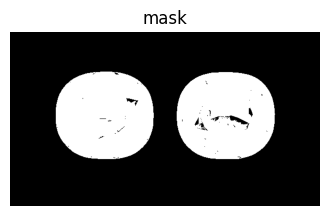

In [72]:
img = cv.imread("images/sapphire.jpg")

# convert to HSV for color segmentation
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV) 

# define HSV range for blue sapphires
lower_blue = np.array([100, 150, 50])
upper_blue = np.array([140, 255, 255])

# threshold the image
mask = cv.inRange(hsv, lower_blue, upper_blue)

plt.figure(figsize=(4,3))
plt.imshow(cv.cvtColor(mask, cv.COLOR_BGR2RGB))
plt.title("mask")
plt.axis("off");

(b) Apply a morphological operation

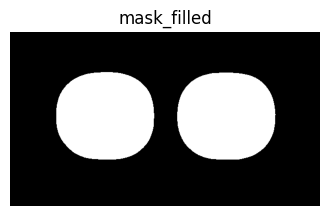

In [73]:
kernel = np.ones((8,8), np.uint8)
mask_filled = cv.morphologyEx(mask, cv.MORPH_CLOSE, kernel)

plt.figure(figsize=(4,3))
plt.imshow(mask_filled, cmap='gray')
plt.title("mask_filled")
plt.axis("off");

(c) Get areas in pixels

In [70]:
# Connected components
num_labels, labels, stats, centroids = cv.connectedComponentsWithStats(mask_filled)

print(f"Number of objects detected: {num_labels-1}")  # subtract 1 for background

areas_pixels = stats[1:, cv.CC_STAT_AREA]  # skip background
print("Areas in pixels:", areas_pixels)

Number of objects detected: 2
Areas in pixels: [30059 30042]


(d) The actual areas of the sapphires

In [ ]:
f = 8  
d = 480  
areas_actual = areas_pixels * (d/f)**2
print("Actual areas (mm^2):", areas_actual)

Actual areas (mm^2): [1.082124e+08 1.081512e+08]
